In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
import seaborn as sns
from sklearn import tree


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/kyphosis.csv')

In [4]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [5]:
df.tail(10)

,Kyphosis,Age,Number,Start
71,absent,127,4,12
72,absent,87,4,16
73,absent,206,4,10
74,absent,11,3,15
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [6]:
df.shape

(81, 4)

In [7]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [9]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [10]:
df[df.duplicated()]

,Kyphosis,Age,Number,Start


In [11]:
df.Kyphosis.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

<Axes: title={'center': 'Percentage of vertebrae present'}, ylabel='Kyphosis'>

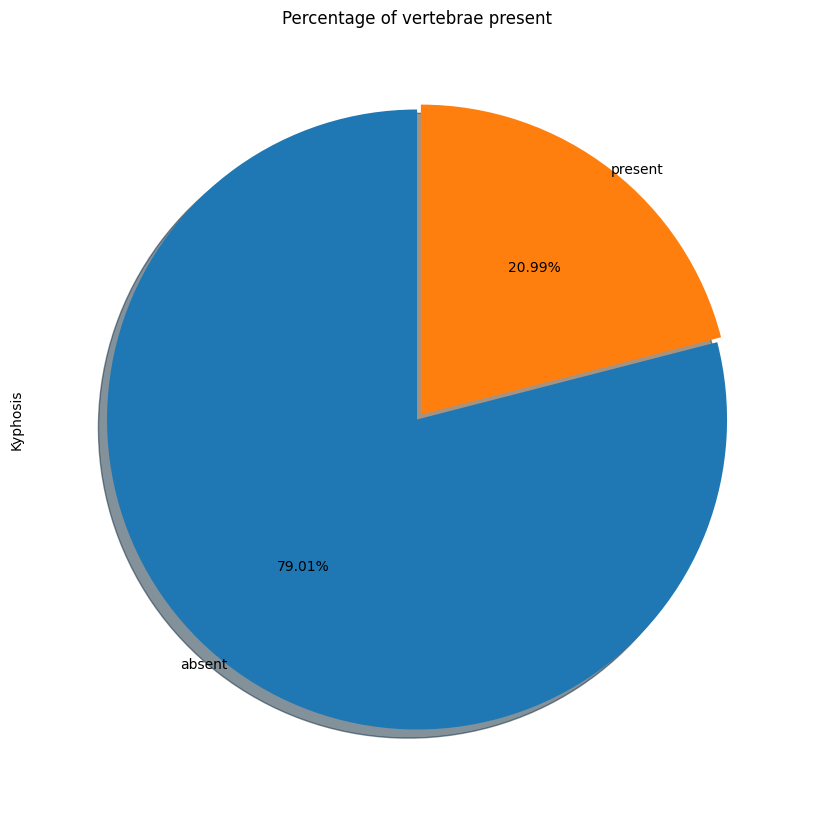

In [12]:
df.Kyphosis.value_counts().plot(kind='pie',figsize=(10,20),title='Percentage of vertebrae present',autopct='%1.2f%%',startangle=90,shadow=True,labeldistance=1,explode=[0,0.02])

<Axes: >

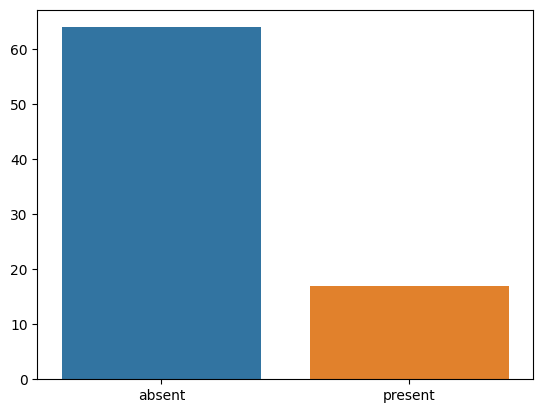

In [13]:
vc = df.Kyphosis.value_counts()
sns.barplot(x = vc.index,y=vc.values)

In [14]:
df.Age.unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36])

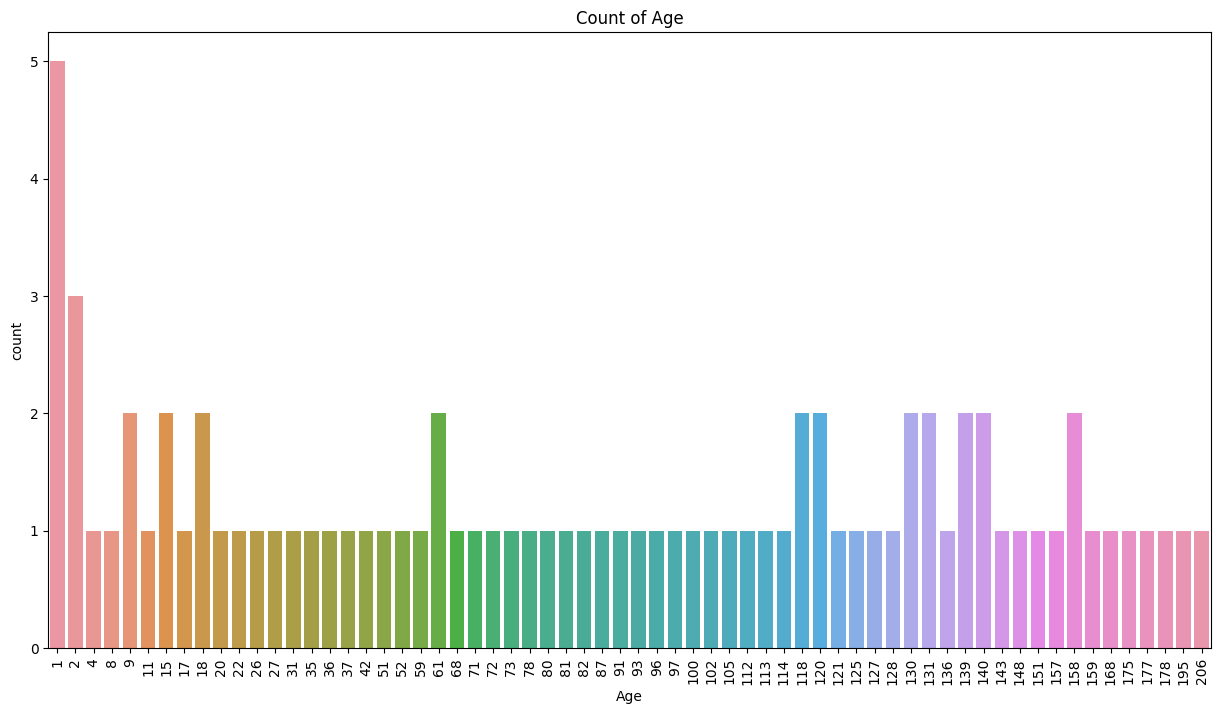

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='Age')
plt.title('Count of Age')
plt.xticks(rotation=90)
plt.show()

<ipython-input-16-f8a66a75c64f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Number'],color = "y")


<Axes: xlabel='Number', ylabel='Density'>

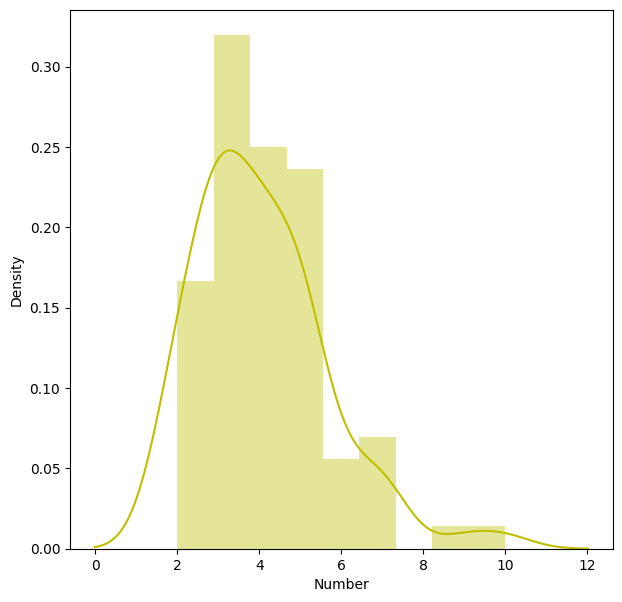

In [16]:
plt.figure(figsize=(7,7))
sns.distplot(df['Number'],color = "y")

<ipython-input-17-efd64347ee0e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Start'],color = "y")


<Axes: xlabel='Start', ylabel='Density'>

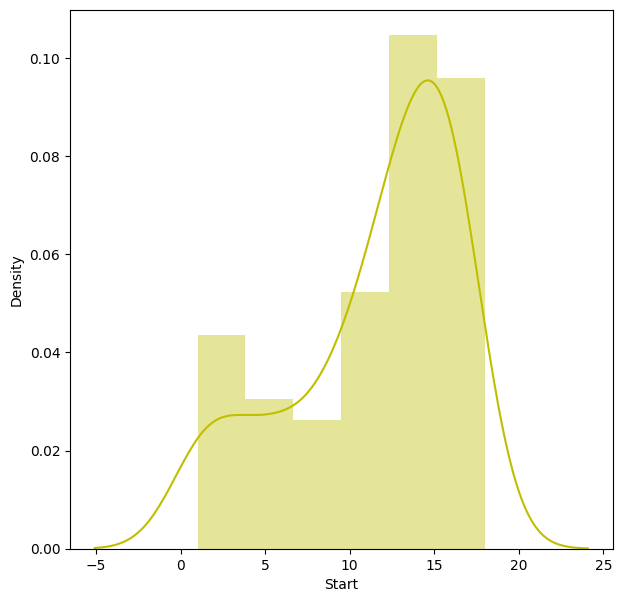

In [17]:
plt.figure(figsize=(7,7))
sns.distplot(df['Start'],color = "y")

<ipython-input-18-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

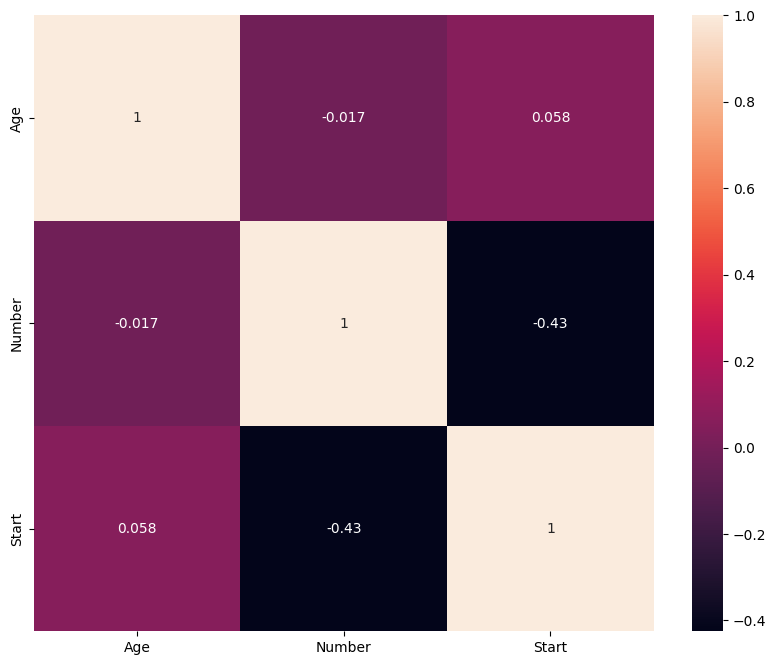

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [19]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [20]:
x_np = x.to_numpy()
y_np = y.to_numpy()

In [21]:
y = y.apply(lambda x:1 if x=='Present' else 0)
y_np = np.where(y_np =='present',1,0)

In [ ]:
x_np

In [ ]:
y_np

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_np,y_np, test_size = 0.3,stratify = y)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(56, 3)
(25, 3)
(56,)
(25,)


In [83]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [84]:
x_train_mm = min_max_scaler.fit_transform(x_train)
x_test_mm = min_max_scaler.fit_transform(x_test)

In [85]:
x_train_std =standard_scaler.fit_transform(x_train)
x_test_std =standard_scaler.fit_transform(x_test)

**Logistic Regression**

In [149]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [150]:
lr.coef_

array([[ 0.00432993,  0.26963964, -0.2258825 ]])

In [151]:
lr.intercept_

array([-0.42040787])

In [152]:
train_preds = lr.predict_proba(x_train)
test_preds = lr.predict_proba(x_test)

In [153]:
test_preds

array([[0.93222499, 0.06777501],
       [0.83059682, 0.16940318],
       [0.36494521, 0.63505479],
       [0.81795274, 0.18204726],
       [0.96114503, 0.03885497],
       [0.92987556, 0.07012444],
       [0.73819333, 0.26180667],
       [0.80039677, 0.19960323],
       [0.8764636 , 0.1235364 ],
       [0.91655344, 0.08344656],
       [0.44157189, 0.55842811],
       [0.95036252, 0.04963748],
       [0.67894201, 0.32105799],
       [0.83754875, 0.16245125],
       [0.6067035 , 0.3932965 ],
       [0.58541585, 0.41458415],
       [0.89151483, 0.10848517],
       [0.37223042, 0.62776958],
       [0.32947342, 0.67052658],
       [0.58896251, 0.41103749],
       [0.90696145, 0.09303855],
       [0.93788718, 0.06211282],
       [0.89306559, 0.10693441],
       [0.33261223, 0.66738777],
       [0.42711501, 0.57288499]])

In [154]:
train_preds

array([[0.85177842, 0.14822158],
       [0.8932042 , 0.1067958 ],
       [0.87061481, 0.12938519],
       [0.9121309 , 0.0878691 ],
       [0.9201978 , 0.0798022 ],
       [0.77862892, 0.22137108],
       [0.97042827, 0.02957173],
       [0.46166995, 0.53833005],
       [0.72126136, 0.27873864],
       [0.96943937, 0.03056063],
       [0.942978  , 0.057022  ],
       [0.25345804, 0.74654196],
       [0.95544282, 0.04455718],
       [0.47926959, 0.52073041],
       [0.95284295, 0.04715705],
       [0.93938351, 0.06061649],
       [0.97616488, 0.02383512],
       [0.89554651, 0.10445349],
       [0.77866158, 0.22133842],
       [0.8644875 , 0.1355125 ],
       [0.90871205, 0.09128795],
       [0.49788883, 0.50211117],
       [0.88989951, 0.11010049],
       [0.96770423, 0.03229577],
       [0.95653582, 0.04346418],
       [0.80868085, 0.19131915],
       [0.80934986, 0.19065014],
       [0.94390217, 0.05609783],
       [0.87758026, 0.12241974],
       [0.79524315, 0.20475685],
       [0.

In [155]:
train_class_preds = lr.predict(x_train)
test_class_pred = lr.predict(x_test)

In [156]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

In [157]:
train_accuracy

0.8392857142857143

In [158]:
test_accuracy

0.8

[[41  3]
 [ 6  6]]


[Text(0, 0.5, 'Present'), Text(0, 1.5, 'absent')]

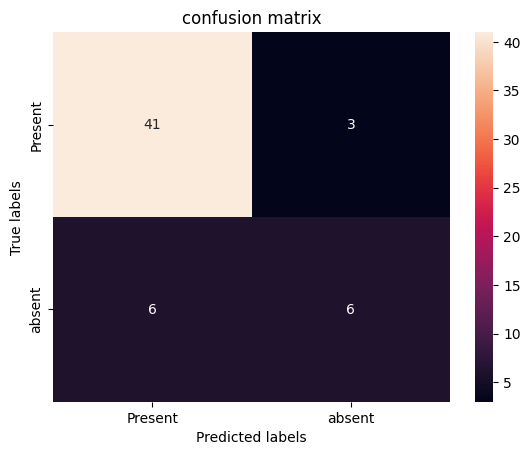

In [159]:
labels = ['Present','absent']
cm = confusion_matrix(y_train,train_class_preds)
print(cm)


ax = plt.subplot()
sns.heatmap(cm,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[17  3]
 [ 2  3]]


[Text(0, 0.5, 'Present'), Text(0, 1.5, 'absent')]

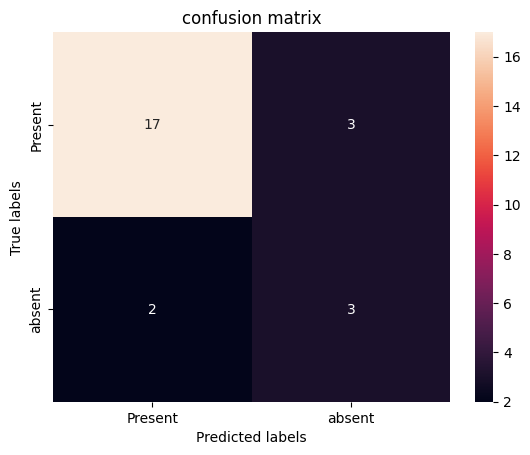

In [160]:
labels = ['Present','absent']
cm = confusion_matrix(y_test,test_class_pred)
print(cm)


ax = plt.subplot()
sns.heatmap(cm,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Naive Bayes Classifier**

In [113]:
nb = GaussianNB().fit(x_train_mm,y_train)

In [139]:
train_pred = nb.predict(x_train_mm)
test_pred = nb.predict(x_test_mm)

In [140]:
train_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [141]:
test_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [142]:
accuracy_score(nb.predict(x_test), y_test)

0.68

**SVM**

In [118]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',gamma=0.2, C=1.0)
svm.fit(x_train_mm,y_train)

SVC(gamma=0.2)

In [119]:
svm.support_vectors_

array([[0.08292683, 0.25      , 0.58823529],
       [0.67804878, 0.375     , 0.58823529],
       [0.12682927, 0.25      , 0.47058824],
       [0.63414634, 0.        , 0.11764706],
       [0.63414634, 0.375     , 0.70588235],
       [0.62926829, 0.375     , 0.70588235],
       [0.12195122, 0.625     , 0.70588235],
       [0.3902439 , 0.25      , 0.        ],
       [0.07804878, 0.25      , 0.52941176],
       [0.84878049, 0.375     , 0.70588235],
       [0.69268293, 0.875     , 0.11764706],
       [1.        , 0.25      , 0.52941176],
       [0.03414634, 0.125     , 0.29411765],
       [0.46341463, 0.125     , 0.64705882],
       [0.28292683, 0.5       , 0.64705882],
       [0.55121951, 0.625     , 0.41176471],
       [0.06829268, 0.625     , 0.05882353],
       [0.6195122 , 0.25      , 0.23529412],
       [0.67317073, 1.        , 0.29411765],
       [0.62926829, 0.25      , 0.        ],
       [0.35121951, 0.375     , 0.        ],
       [0.76097561, 0.125     , 0.70588235],
       [0.

In [120]:
accuracy_score(svm.predict(x_test_mm), y_test)

0.8

**Decision Tree Classifier**

In [122]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth = 4)
dtc.fit(x_train_mm,y_train)

DecisionTreeClassifier(max_depth=4)

In [143]:
params = {'max_leaf_nodes':list(range(2,100)),'max_depth':[4,5,6],'min_samples_split':[2,3,4]}
grid_cv = GridSearchCV(DecisionTreeClassifier(random_state = 0), params,verbose=1,cv=3)
grid_cv.fit(x_train_mm, y_train)

Fitting 3 folds for each of 882 candidates, totalling 2646 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [144]:
grid_cv.best_params_

{'max_depth': 4, 'max_leaf_nodes': 3, 'min_samples_split': 2}

In [161]:
best_dtc = DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 3, min_samples_split = 2,max_depth = 4, random_state = 0)
best_dtc.fit(x_train_mm,y_train)
y_predict = best_dtc.predict(x_test_mm)

In [162]:
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [163]:
accuracy_score(y_test,y_predict)*100

76.0

[Text(0.6, 0.8333333333333334, 'x[2] <= 0.441\ngini = 0.337\nsamples = 56\nvalue = [44, 12]'),
 Text(0.4, 0.5, 'x[1] <= 0.188\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.8, 0.5, 'gini = 0.198\nsamples = 45\nvalue = [40, 5]')]

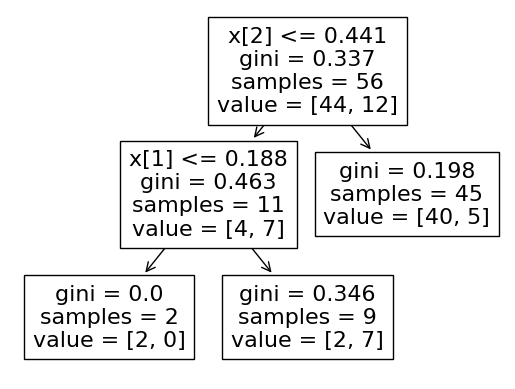

In [164]:
tree.plot_tree(best_dtc)

**Random Forest Model**

In [65]:
n_estimators = [10,50,100,150,200]

max_depth = list(range(2,12))

min_samples_split = [50,75,100]

min_samples_leaf = [40,45,50]

param_dict = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [66]:
param_dict

{'n_estimators': [10, 50, 100, 150, 200],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'min_samples_split': [50, 75, 100],
 'min_samples_leaf': [40, 45, 50]}

In [129]:
rf_model = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 10, verbose=2, scoring='accuracy')

rf_grid.fit(x_train_mm,y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=50, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=50, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=50, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=50, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=50, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=50, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=50, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=50, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=50, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [40, 45, 50],
                         'min_samples_split': [50, 75, 100],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [130]:
rf_grid.best_params_

{'max_depth': 2,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 10}

In [131]:
best_rf_model = RandomForestClassifier(max_depth=6,min_samples_leaf = 40,min_samples_split=50,n_estimators = 60)
best_rf_model.fit(x_train_mm,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=60)

In [132]:
y_pred_train = best_rf_model.predict(x_train_mm)
y_pred_test = best_rf_model.predict(x_test_mm)



In [133]:
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)

In [134]:
train_accuracy

0.7857142857142857

In [135]:
test_accuracy

0.8

In [136]:
test_cm = confusion_matrix(y_test,y_pred_test)

In [137]:
test_cm

array([[20,  0],
       [ 5,  0]])

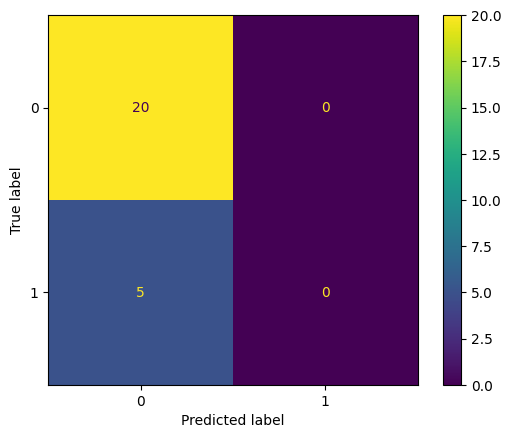

In [138]:
disp= ConfusionMatrixDisplay(test_cm)
disp.plot()